In [176]:
#[0]
import numpy as np
from gensim.models.keyedvectors import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.test.utils import datapath, get_tmpfile
import json #https://stackoverflow.com/questions/7100125/storing-python-dictionaries
import pickle #https://stackoverflow.com/questions/11218477/how-can-i-use-pickle-to-save-a-dict
import os
#[1]
from sklearn.manifold import MDS
from scipy.spatial import procrustes
import matplotlib.pyplot as plt

%matplotlib inline

#[2]
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN

#[3]
from sklearn import decomposition
from scipy.spatial import distance_matrix


from sklearn.manifold import SpectralEmbedding
from sklearn.manifold import Isomap

from mpl_toolkits import mplot3d

In [128]:
emb = get_emotion_embedding()

In [129]:
mds = MDS(n_components=200,n_init=15,random_state=0)
emb = mds.fit_transform(emb)

In [130]:
dimensions = [200,20,12,8,6,3]

In [179]:
a = distance_matrix(emb,emb)
resultados = []
stress = []
for dim in dimensions:
    print(dim)
    if(dim != 200):
        mds = MDS(n_components=dim,n_init=15,random_state=0)
        X = mds.fit_transform(emb)
    else:
        X = emb
    resp = []
    b = distance_matrix(X,X)
    stress += [calcula_stress(a,b)]
    for i in range(len(a)):
        for j in range(i,len(a[0])):
            if(i!=j):
                resp += [[a[i][j],b[i][j]]]
    resultados += [resp]

200
20
12
8
6
3


In [180]:
stress

[0.0,
 0.02189201041547141,
 0.029811876441595192,
 0.03798303586851788,
 0.045188119368497454,
 0.07157479720600882]

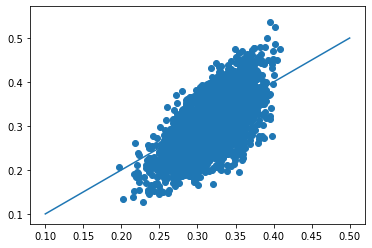

In [146]:
n =3
data = np.array(resultados[n])
plt.scatter(data[:,0],data[:,1])
plt.plot([0.1,0.5],[0.1,0.5])

In [178]:
resultados

[[[0.29589847350189596, 0.29589847350189596],
  [0.3322771300648567, 0.3322771300648567],
  [0.3077580881026317, 0.3077580881026317],
  [0.29476445196986184, 0.29476445196986184],
  [0.3538684722214628, 0.3538684722214628],
  [0.3351766406395727, 0.3351766406395727],
  [0.32014574748755675, 0.32014574748755675],
  [0.32070667993272994, 0.32070667993272994],
  [0.29713639471393033, 0.29713639471393033],
  [0.2799413242262882, 0.2799413242262882],
  [0.3685033847432575, 0.3685033847432575],
  [0.32564960168602447, 0.32564960168602447],
  [0.27374431684668615, 0.27374431684668615],
  [0.303903320715867, 0.303903320715867],
  [0.2495550037109571, 0.2495550037109571],
  [0.27989124944542226, 0.27989124944542226],
  [0.23600190339549318, 0.23600190339549318],
  [0.2405853650046712, 0.2405853650046712],
  [0.28709003547701384, 0.28709003547701384],
  [0.3089662683346002, 0.3089662683346002],
  [0.29115139675336177, 0.29115139675336177],
  [0.2847809419438464, 0.2847809419438464],
  [0.3192761

200


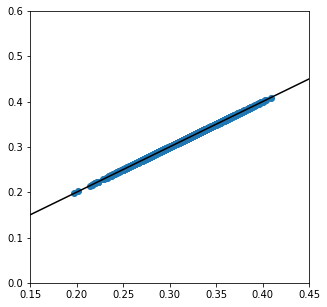

In [177]:
n=0
fig, ax = plt.subplots(1,figsize=(5,5))
for i,data in enumerate(resultados):
    if i == n:
        tmp = np.array(data)
        ax.scatter(tmp[:,0],tmp[:,1])
        ax.plot([0,1],[0,1],c="black")
        ax.set_ylim((0,0.6))
        ax.set_xlim((0.15,0.45))
        print(dimensions[i])

200
20
12
8
6
3


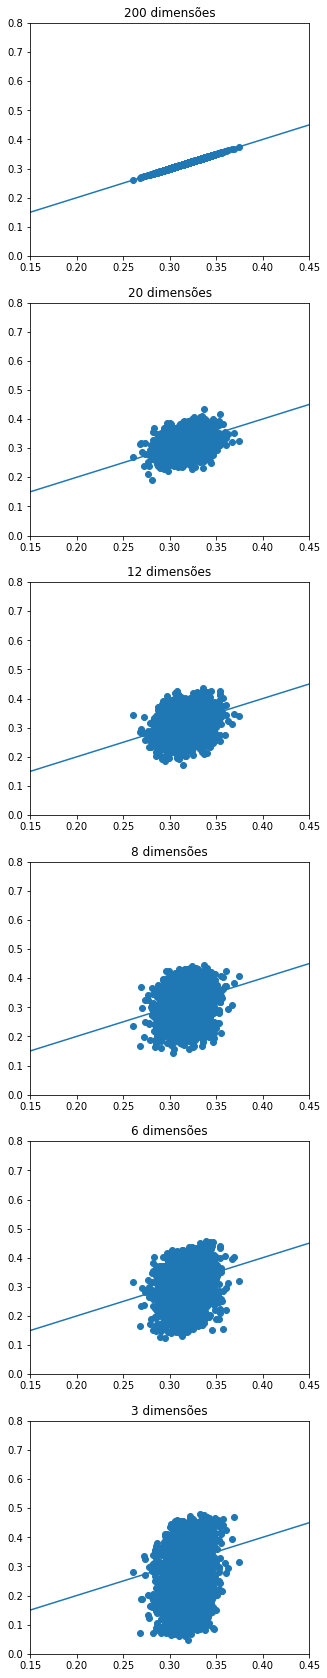

In [118]:
tmp = emb.reshape((len(emb)*len(emb[0])))
rnd = np.zeros_like(emb)
for i in range(len(rnd)):
    for j in range(len(rnd[0])):
        rnd[i][j] = tmp[np.random.randint(len(tmp))]

a = distance_matrix(rnd,rnd)
resultados = []
tmp = np.array(rnd).copy()

# for i in range(1000):
#     x = np.random.randint(len(tmp))
#     y = np.random.randint(len(tmp))
#     x_t = tmp[x].copy()
#     y_t = tmp[y].copy()
#     tmp[x] = y_t
#     tmp[y] = x_t
# tmp = tmp.T
    
# for i in range(1000):
#     x = np.random.randint(len(tmp))
#     y = np.random.randint(len(tmp))
#     x_t = tmp[x].copy()
#     y_t = tmp[y].copy()
#     tmp[x] = y_t
#     tmp[y] = x_t
# tmp = tmp.T

for dim in dimensions:
    print(dim)
    if(dim != 200):
        mds = MDS(n_components=dim,n_init=15,random_state=0)
        X = mds.fit_transform(tmp)
    else:
        X = tmp
    resp = []
    b = distance_matrix(X,X)
    for i in range(len(a)):
        for j in range(i,len(a[0])):
            if(i!=j):
                resp += [[a[i][j],b[i][j]]]
    resultados += [resp]
fig, ax = plt.subplots(len(resultados),figsize=(5,30))
for i,data in enumerate(resultados):
    tmp = np.array(data)
    ax[i].scatter(tmp[:,0],tmp[:,1])
    ax[i].plot([0,1],[0,1])
    ax[i].set_ylim((0,0.8))
    ax[i].set_xlim((0.15,0.45))
    text = str(dimensions[i]) + " dimensões"
    ax[i].title.set_text(text)



200
20
12
8
6
3


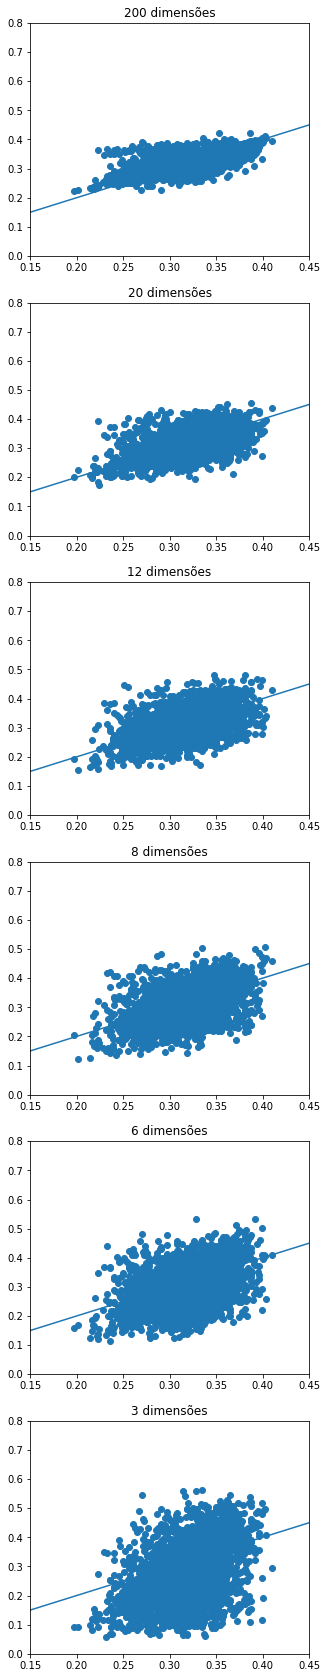

In [92]:
a = distance_matrix(emb,emb)
resultados = []

tmp = np.array(emb).copy()
stress = []
for i in range(14):
    x = np.random.randint(len(tmp))
    y = np.random.randint(len(tmp))
    x_t = tmp[x].copy()
    y_t = tmp[y].copy()
    tmp[x] = y_t
    tmp[y] = x_t
tmp = tmp.T
    
for i in range(7):
    x = np.random.randint(len(tmp))
    y = np.random.randint(len(tmp))
    x_t = tmp[x].copy()
    y_t = tmp[y].copy()
    tmp[x] = y_t
    tmp[y] = x_t
tmp = tmp.T

for dim in dimensions:
    print(dim)
    mds = MDS(n_components=dim,n_init=15,random_state=0)
    X = mds.fit_transform(tmp)
    stress = [calcula_stress_embeddings(emb,X)] + stress
    resp = []
    b = distance_matrix(X,X)
    for i in range(len(a)):
        for j in range(i,len(a[0])):
            if(i!=j):
                resp += [[a[i][j],b[i][j]]]
    resultados += [resp]
fig, ax = plt.subplots(len(resultados),figsize=(5,30))
for i,data in enumerate(resultados):
    tmp = np.array(data)
    ax[i].scatter(tmp[:,0],tmp[:,1])
    ax[i].plot([0,1],[0,1])
    ax[i].set_ylim((0,0.8))
    ax[i].set_xlim((0.15,0.45))
    text = str(dimensions[i]) + " dimensões"
    ax[i].title.set_text(text)




In [108]:
stress.reverse()

In [110]:
stress

[0.020225629301172342,
 0.03011430467979907,
 0.036530602008457216,
 0.04432446851398259,
 0.05185880869233121,
 0.07607784584447372]

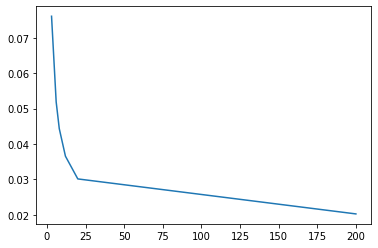

In [109]:
plt.plot(dimensions,stress)

In [101]:
dimensions.reverse()

In [102]:
dimensions

[200, 20, 12, 8, 6, 3]

In [2]:
def get_emotion_embedding():
    return get_emb_concat()

def get_final_embs(dimensions = 200):
    embs = get_clean_embeddings()
    embs += [get_emb_soma()]
    embs += [get_emb_concat()]


    mds = MDS(n_components=dimensions)
    #Trata embeddings, filtrando somente os sentimentos principais e colocando no numero minimo de dimensoes
    embeddings = []
    for i in range(len(embs)):
        transformed_embedding = mds.fit_transform(embs[i])
        embeddings += [transformed_embedding]
    embs = embeddings

    for a in range(len(embs)):
        for b in range(len(embs)):
            embs[a],embs[b],r = procrustes(embs[a],embs[b])
    for i in range(200):
        a = np.random.randint(len(embs))
        b = np.random.randint(len(embs))
        embs[a],embs[b],r = procrustes(embs[a],embs[b])
    return embs

def calcula_stress_embeddings(d_original, d_proposta):
    d_original = distance_matrix(d_original,d_original)
    d_proposta = distance_matrix(d_proposta,d_proposta)
    a = np.sum((d_original-d_proposta)**2)
    b = np.sum(d_original**2)
    return np.sqrt(a/b)/4

def calcula_stress(d_original, d_proposta):
    a = np.sum((d_original-d_proposta)**2)
    b = np.sum(d_original**2)
    return np.sqrt(a/b)/4

def get_emb_soma():
    embeddings = get_clean_embeddings()
    sentiments = get_sentiments()
    assemble_embeddings_soma = np.zeros_like(embeddings[0])
    for i in embeddings:
        for c in range(75):
            assemble_embeddings_soma[c] = assemble_embeddings_soma[c] + i[c]
    return assemble_embeddings_soma

def get_emb_concat():
    embeddings = get_clean_embeddings()
    sentiments = get_sentiments()
    assemble_embeddings_concat = []

    for c in range(len(sentiments)):
        tmp = np.array([])
        for i in embeddings:
            tmp = np.concatenate((tmp,i[c]))
        assemble_embeddings_concat += [tmp]
    return assemble_embeddings_concat


def get_emb_media():
    #média dos vetores e retirando outliers
    embeddings = get_clean_embeddings()
    sentiments = get_sentiments()
    assemble_embeddings_media = np.zeros_like(embeddings[0])
    vec = []
    dist = []
    for c in range(75):
        tmp = np.array([])
        vec = []
        for i in embeddings:
            vec += [i[c]]

        centroid = np.zeros_like(vec[0])
        for i in vec:
            centroid = centroid + i
        centroid = centroid/len(vec)

        dist = []
        for i in vec:
            dist += [np.linalg.norm(i-centroid)]

        limitante_distancia_para_corte = np.max(dist)

        counter = 0
        for n,i in enumerate(embeddings):
            if dist[n]!=limitante_distancia_para_corte:
                assemble_embeddings_media[c] += i[c] 
                counter+=1

        assemble_embeddings_media[c] = assemble_embeddings_media[c]/counter
    return assemble_embeddings_media


def get_clean_embeddings():
#Seleciona somente os vetores principais das nossas embeddings
    sentiments = get_sentiments()
    raw_embeddings = []
    dimensions_size = []
    for i in range(4):
        tmp = get_vectors_embedding(i)
        raw_embeddings += [tmp]
        dimensions_size+=[len(get_sentiment_vector(tmp,sentiments[0]))]
#Faz o corte para o menor tamanho de dimensão
    n_dimensions = np.min(dimensions_size)
    # n_dimensions = 10
    mds = MDS(n_components=n_dimensions)
#Trata embeddings, filtrando somente os sentimentos principais e colocando no numero minimo de dimensoes
    embeddings = []
    for i in range(4):
        tmp_embedding = []
        for s in sentiments:
            tmp_embedding += [get_sentiment_vector(raw_embeddings[i],s)]
        transformed_embedding = mds.fit_transform(tmp_embedding)
        embeddings += [transformed_embedding]
    # Calcula erro entre nossos modelos
    for a in range(len(embeddings)):
        for b in range(len(embeddings)):
            embeddings[a],embeddings[b],r = procrustes(embeddings[a],embeddings[b])
    return embeddings

def print_anotado(emb):
    fig, ax = plt.subplots(figsize=(15,15))
    ax.scatter(emb[:,0], emb[:,1])
    n = get_sentiments()
    
    for i, txt in enumerate(n):
        ax.annotate(" "+txt, (emb[:,0][i], emb[:,1][i]))

def print_anotado2(emb):
    fig, ax = plt.subplots(figsize=(15,15))
    for e in emb:
        ax.scatter(e[:,0], e[:,1])
        n = get_sentiments()

        for i, txt in enumerate(n):
            ax.annotate(txt, (e[:,0][i], e[:,1][i]))

def print_2d(embs):
    res = []
    mds_2 = MDS(n_components=2)
    for e in embs:
        res += [mds_2.fit_transform(e)]
    for p in res:
        plt.scatter(p[:,0],p[:,1])

def get_sentiment_vector(embedding, sentiment):
    return embedding[sentiment]["vectors"][sentiment]

def get_vectors_embedding(n):
    files = os.listdir("models")
    model_file_name = []
    for file in files:
        model_file_name += [file]
    escolhidos = [model_file_name[14],model_file_name[5],model_file_name[7],model_file_name[3]]
    with open("models/"+escolhidos[n], 'rb') as handle:
        b = pickle.load(handle)
    return b

def get_sentiments_old():
    sentiments = np.load("./sentiments_list.npy")
    return sentiments
def get_sentiments():
    sentiments = np.load("./sentiments_list.npy")
    sentiments = np.concatenate((sentiments[:26],sentiments[27:]))
    return sentiments